In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../../data/state-agency-co2e-data-2010-2014.csv')
df.head()

,Organization Name,Emission Year,Facility Name,Source Name,Activity Type,Fuel Type,Fuel,End Use Sector,Technology,CO2e
0,California Department of General Services,2013,000 Fleet Vehicles,NaN,SEM: Mobile Combustion - Scope 1,N\A,N\A,N\A,N\A,563.025594
1,California Department of General Services,2010,Lease#2243001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,848.793031
2,California Department of General Services,2010,Lease#5098002,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,12.768303
3,California Department of General Services,2010,Lease#5107001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,4.683929
4,California Department of General Services,2010,Lease#5368001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,0.265898


#### Structure

This data was stored as a csv file on the [data.ca.gov](https://data.ca.gov/dataset/calepa-state-agency-co2) website which made it very easy to read into a dataframe.

#### Granularity

In [79]:
df.shape

(8457, 10)

Each record is a different emission from different organizations, fuel type, year, activity, and end use sector. Each record is not aggregated for any feature and is a unique record of the different features. There are 10 different features and 8,457 records. 

#### Scope

In [78]:
print('Minimum Year:', df['Emission Year'].min())
print('Maximum Year:', df['Emission Year'].max())

Minimum Year: 2010
Maximum Year: 2014


This dataset covers the years between 2010 and 2014. Spatially, the data covers statewide for Califor

#### Temporality

Although the scope of the data covers the 2010-2014 realm (2010-01-01 - 2014-12-31), according to the [data.ca.gov](https://data.ca.gov/dataset/calepa-state-agency-co2), this dataset was created in August 9th 2019 and was last updated in October 23, 2019.

#### Faithfulness

This data was collected by state agency reporters and entered into the Climate Registry Information System. These agencies enter in the raw data into this system which calculates the total CO2e for each source/facility.

# Data Cleaning

In [14]:
df.shape

(8457, 10)

In [17]:
df.columns

Index(['Organization Name', 'Emission Year', 'Facility Name', 'Source Name',
       'Activity Type', 'Fuel Type', 'Fuel', 'End Use Sector', 'Technology',
       'CO2e'],
      dtype='object')

In [32]:
df['Organization Name'].value_counts()

California Department of Fish and Wildlife (formerly California Dept of Fish and Game prior to 2013)    2272
California Department of General Services                                                                958
California Employment Development Department                                                             865
California Department of Corrections and Rehabilitation                                                  771
California Department of Forestry and Fire Protection                                                    695
California Environmental Protection Agency                                                               580
California Department of Rehabilitation                                                                  477
California Public Employees' Retirement System                                                           188
California Department of Social Services                                                                 184
California Departme

In [13]:
wee = df[df["Organization Name"].str.contains("California Department of General Services")]
wee


,Organization Name,Emission Year,Facility Name,Source Name,Activity Type,Fuel Type,Fuel,End Use Sector,Technology,CO2e
0,California Department of General Services,2013,000 Fleet Vehicles,NaN,SEM: Mobile Combustion - Scope 1,N\A,N\A,N\A,N\A,563.025594
1,California Department of General Services,2010,Lease#2243001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,848.793031
2,California Department of General Services,2010,Lease#5098002,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,12.768303
3,California Department of General Services,2010,Lease#5107001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,4.683929
4,California Department of General Services,2010,Lease#5368001,NaN,SEM: Purchased Electricity - Scope 2,N\A,N\A,N\A,N\A,0.265898
...,...,...,...,...,...,...,...,...,...,...
5194,California Department of General Services,2014,Lease#5751001,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,80.097359
5195,California Department of General Services,2014,Lease#5837001,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,197.338917
5196,California Department of General Services,2014,Lease#5893001,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,30.050371
5197,California Department of General Services,2014,Lease#6010001,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,74.438351


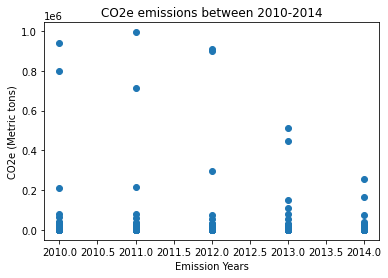

In [75]:
plt.scatter(df['Emission Year'], df['CO2e'])
plt.xlabel('Emission Years')
plt.ylabel('CO2e (Metric tons)')
plt.title("CO2e emissions between 2010-2014")
plt.show()

In [39]:
df2010 = df[df["Emission Year"] == 2010]
df2011 = df[df["Emission Year"] == 2011]
df2012 = df[df["Emission Year"] == 2012]
df2013 = df[df["Emission Year"] == 2013]
df2014 = df[df["Emission Year"] == 2014]
df2010.columns

Index(['Organization Name', 'Emission Year', 'Facility Name', 'Source Name',
       'Activity Type', 'Fuel Type', 'Fuel', 'End Use Sector', 'Technology',
       'CO2e'],
      dtype='object')

In [41]:
df2010['Fuel Type'].unique()

array(['N\\A', 'WECC California', 'Natural Gas', 'Motor Gasoline', nan,
       'Petroleum Products', 'Biofuels', 'Alternative Fuels',
       'Diesel Fuel', 'Aircraft Fuel', 'WECC Southwest', 'WECC Northwest',
       'Ethane', 'PreCalculated', 'Coal', 'US Territories',
       'Fossil Fuel-derived Fuels (gaseous)'], dtype=object)

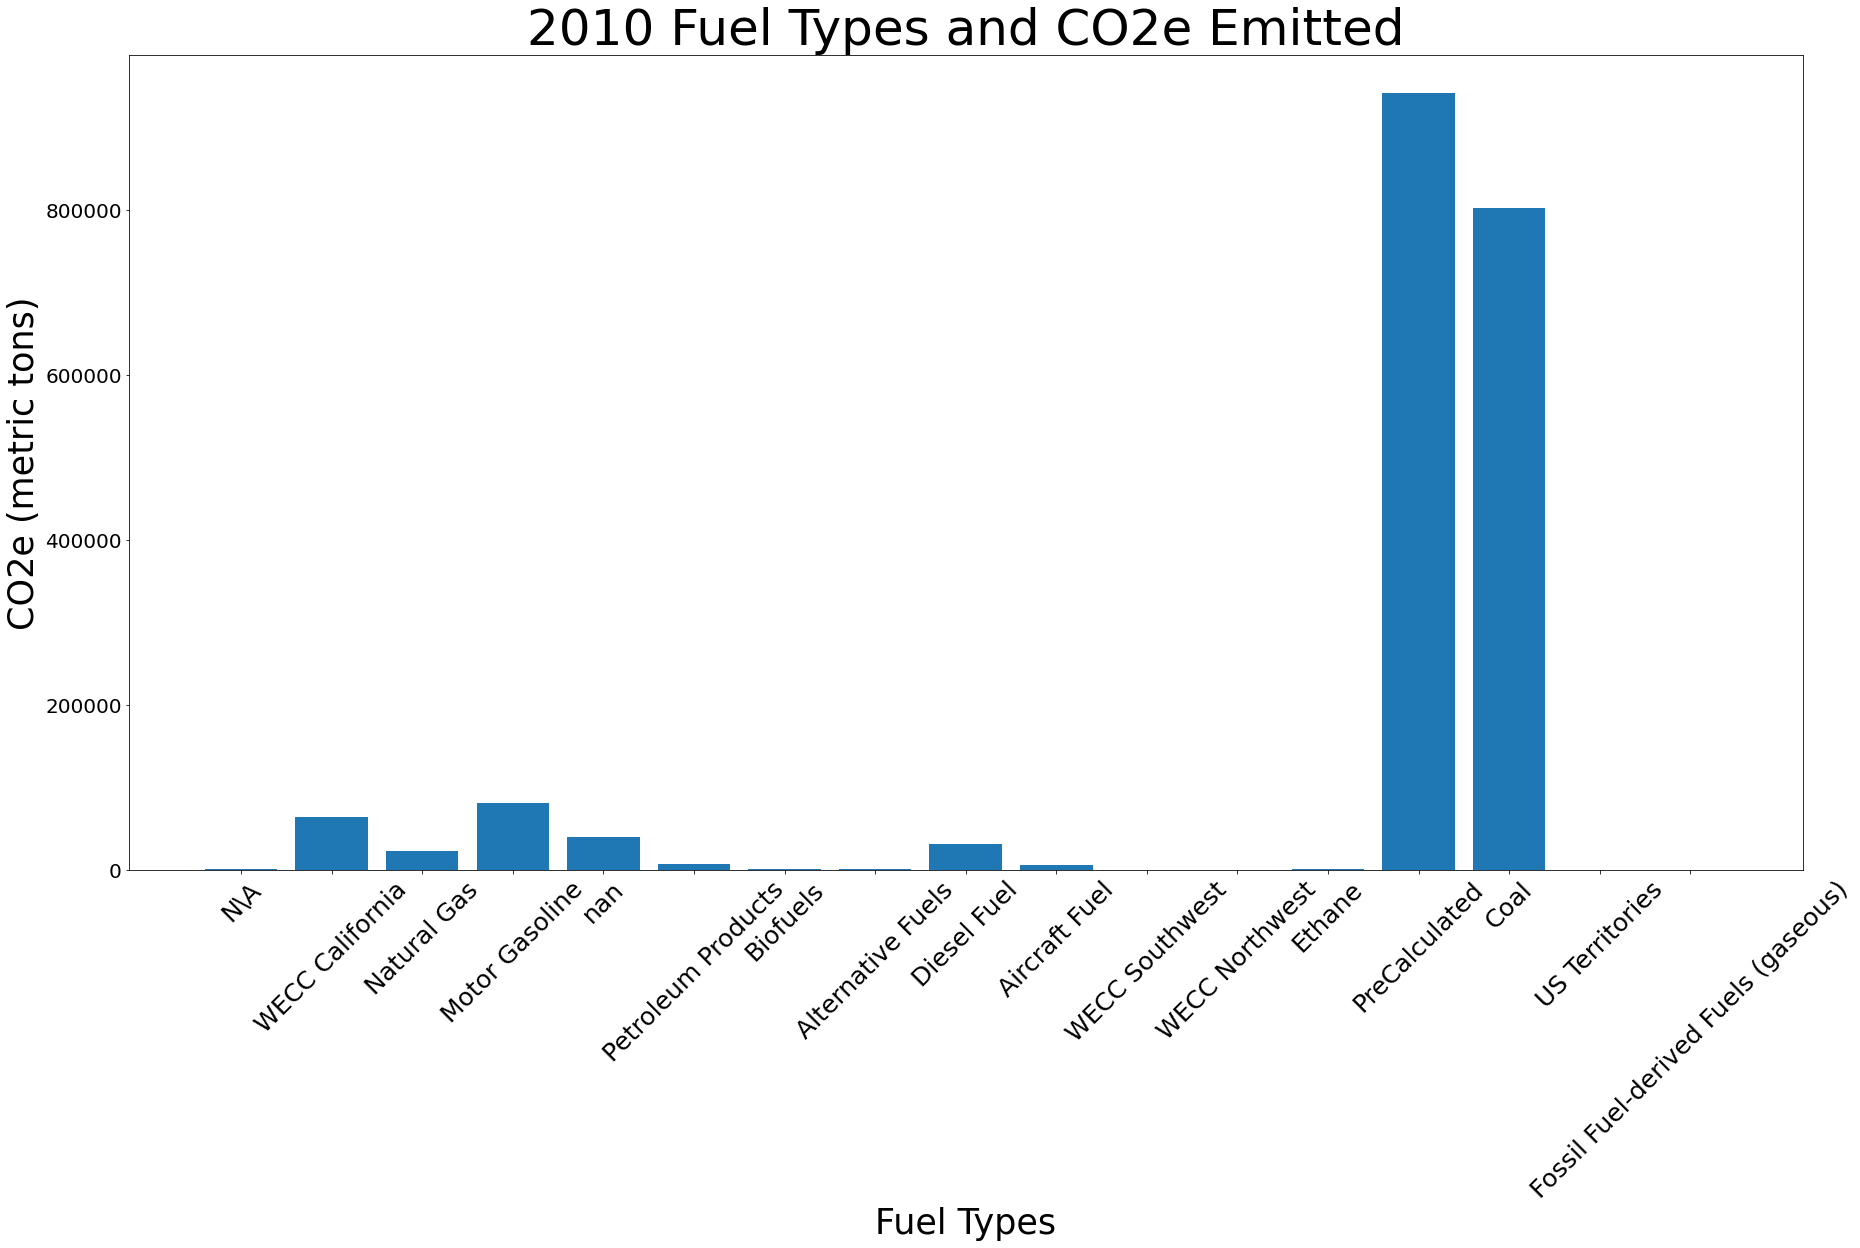

In [74]:
plt.figure(figsize=(30,15))
plt.bar(np.array(df2010['Fuel Type'].tolist()), df2010['CO2e'])
plt.tick_params(axis="x", rotation = 45, labelsize=25)
plt.tick_params(axis = 'y', labelsize=20)
plt.ylabel('CO2e (metric tons)', fontsize = 35)
plt.xlabel('Fuel Types', fontsize = 35)
plt.title('2010 Fuel Types and CO2e Emitted', fontsize = 50)

plt.show()

In [ ]:
pd.value_counts(df[''])